In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-natural-calamities-dataset/Updated Data 1.csv
/kaggle/input/global-natural-calamities-dataset/Data.csv


Project Aim:

Analyze Global Natural Disaster Patterns:
Examine historical disaster data (wildfires, floods, storms, etc.) to understand trends over time, geographic hotspots, and the frequency of events.

Predict Disaster Occurrences or Severity:
Build a predictive model that can estimate:

The type/category of a disaster based on location, time, and other features (classification), or

The severity/impact of a disaster, such as number of affected people or economic damage (regression).

Support Decision-Making for Disaster Response:
Use insights and predictions to help governments, NGOs, and emergency response teams prioritize resources, plan evacuations, and reduce human and economic losses.

Visualize Trends and Insights:
Create interactive dashboards (in Tableau Public) showing:

Disaster frequency over years and months

Geographic distribution of disasters on maps

Category-wise distribution (e.g., wildfires vs. storms)

Key metrics (total disasters, affected population, etc.)

Demonstrate Data Handling Skills:
Showcase handling of missing data, feature engineering, temporal and spatial analysis, and integration of AI models with visualizations.

The project combines data cleaning, visualization, and predictive modeling to understand and anticipate natural disasters, helping organizations respond faster and more effectively.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/global-natural-calamities-dataset/Data.csv')




In [4]:
# Quick overview
print(df.head())
print(df.info())
print(df.isnull().sum())

            ID                                       Title  \
0  EONET_14198          HOPE Wildfire  Stevens  Washington   
1  EONET_14200           Hot Canyon Wildfire  Elko  Nevada   
2  EONET_14215  13 MILE FIRE Wildfire  Palm Beach  Florida   
3  EONET_14209        UDC Fire Wildfire  Jefferson  Oregon   
4  EONET_14199        0482 SUNRISE Wildfire  Crook  Oregon   

                        Description Category_title  Geometry_Coordinates_1  \
0  15 Miles N from KETTLE FALLS  WA      Wildfires  -117.982361  48.821248   
1     10 Miles NW from Montello  NV      Wildfires     -114.336333  41.368   
2   21 Miles S from BELLE GLADE  FL      Wildfires      -80.79  26.3833333   
3  1 Miles SW from warm springs  OR      Wildfires  -121.288889  44.803444   
4        8 Miles S from Paulina  OR      Wildfires  -120.038167  44.019167   

  Geometry_Coordinates_2 Geometry_Coordinates_3 Geometry_Coordinates_4  \
0                    NaN                    NaN                    NaN   
1         

Step 2: Handle Missing Values

In [5]:
# Fill missing coordinates with NaN or ignore them if not needed
df['Geometry_Coordinates_2'] = df['Geometry_Coordinates_2'].fillna(0)
df['Geometry_Coordinates_3'] = df['Geometry_Coordinates_3'].fillna(0)
df['Geometry_Coordinates_4'] = df['Geometry_Coordinates_4'].fillna(0)

# Fill missing descriptions with "No description"
df['Description'] = df['Description'].fillna("No description")


Step 3: Process Date & Time

In [6]:
# Combine Date & Time into a datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Extract Year, Month, Day, Hour for analysis
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour


Step 4: Basic Aggregation & Feature Engineering

In [7]:
# Convert coordinate to numeric (errors='coerce' will make invalid strings NaN)
df['Geometry_Coordinates_1'] = pd.to_numeric(df['Geometry_Coordinates_1'], errors='coerce')

# Optional: fill NaN with 0 or median
df['Geometry_Coordinates_1'] = df['Geometry_Coordinates_1'].fillna(0)

# Now you can safely create a numeric feature
df['Disaster_Severity'] = df['Geometry_Coordinates_1'].abs()


Step 5: Save Cleaned Data

In [2]:
df.to_csv('processed_disaster_events.csv', index=False)
print("Processed dataset saved as 'processed_disaster_events.csv'")


Processed dataset saved as 'processed_disaster_events.csv'


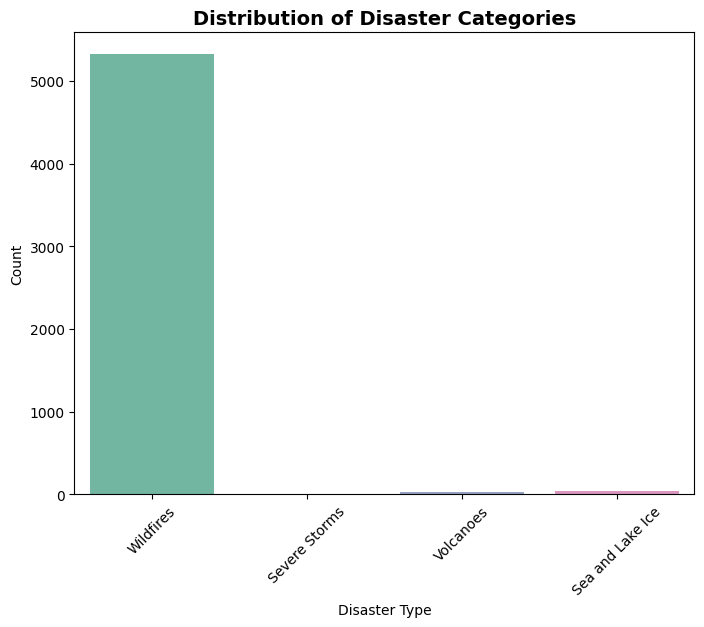

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x="Category_title", data=df, palette="Set2")  # soft colors
plt.title("Distribution of Disaster Categories", fontsize=14, fontweight="bold")
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


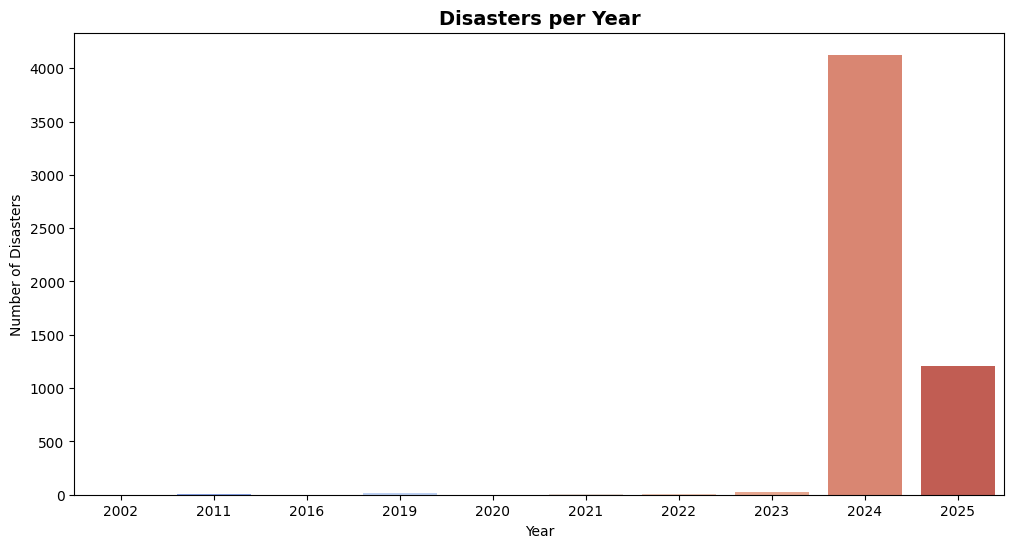

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(x="Year", data=df, palette="coolwarm")  # gradient color
plt.title("Disasters per Year", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.show()


In [1]:
import folium
from IPython.display import IFrame
import pandas as pd
import numpy as np


# Load your data into a DataFrame
df = pd.read_csv("/kaggle/input/global-natural-calamities-dataset/Updated Data 1.csv")

print(df.head())  # ✅ Check first few rows to ensure it loaded correctly

# Create base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles="CartoDB positron")

# Add wildfire points
for _, row in df.iterrows():
    try:
        lat = float(str(row['Geometry_Coordinates_2']).split()[0])  # Latitude
        lon = float(str(row['Geometry_Coordinates_1']).split()[0])  # Longitude
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color="red",
            fill=True,
            fill_opacity=0.6,
            popup=f"{row['Title']} ({row['Date']})"
        ).add_to(m)
    except:
        continue  # Skip rows with missing/invalid coords

# Save map
m.save("disaster_map.html")

# Display map inline in Kaggle
IFrame("disaster_map.html", width=900, height=600)


            ID                                       Title  \
0  EONET_14198          HOPE Wildfire  Stevens  Washington   
1  EONET_14200           Hot Canyon Wildfire  Elko  Nevada   
2  EONET_14215  13 MILE FIRE Wildfire  Palm Beach  Florida   
3  EONET_14209        UDC Fire Wildfire  Jefferson  Oregon   
4  EONET_14199        0482 SUNRISE Wildfire  Crook  Oregon   

                        Description Category_title        Date      Time  \
0  15 Miles N from KETTLE FALLS  WA      Wildfires  2025-07-08  16:38:00   
1     10 Miles NW from Montello  NV      Wildfires  2025-07-08  16:18:00   
2   21 Miles S from BELLE GLADE  FL      Wildfires  2025-07-08  15:34:00   
3  1 Miles SW from warm springs  OR      Wildfires  2025-07-07  22:59:00   
4        8 Miles S from Paulina  OR      Wildfires  2025-07-07  14:45:00   

   Year   Longitude   Latitude  
0  2025 -117.982361  48.821248  
1  2025 -114.336333  41.368000  
2  2025  -80.790000  26.383333  
3  2025 -121.288889  44.803444  
4  20

In [12]:
df['Longitude'] = pd.to_numeric(df['Geometry_Coordinates_1'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Geometry_Coordinates_2'], errors='coerce')

# Keep only necessary fields
map_df = df[['ID','Category_title','Longitude','Latitude']]
map_df.to_csv("disaster_map_data.csv", index=False)
